In [16]:
import pandas as pd
from scipy.stats import ttest_ind

try:
    # Load the CSV file
    df = pd.read_csv('all_nested_cv_results_few.csv')

    # --- NEW: Filter the DataFrame to only include results for the 'LGBM' model ---
    df_filtered = df[df['Model'] == 'LGBM'].copy()
    
    print("--- Analysis for 'LGBM' Model Only ---")

    # Use the correct column name
    score_column_name = 'Test Score' 

    # Isolate scores for TempusGan from the filtered data
    tempusgan_scores = df_filtered[df_filtered['Synth_Type'] == 'TempusGan'][score_column_name].dropna()

    # Get other methods present in the filtered data
    other_methods = df_filtered[df_filtered['Synth_Type'] != 'TempusGan']['Synth_Type'].unique()

    p_value_results = []

    for method in other_methods:
        method_scores = df_filtered[df_filtered['Synth_Type'] == method][score_column_name].dropna()
        
        # Check if there are enough data points to compare
        if not tempusgan_scores.empty and not method_scores.empty:
            t_statistic, p_value = ttest_ind(tempusgan_scores, method_scores, equal_var=False)
            
            p_value_results.append({
                'Comparison': f'TempusGan vs. {method}',
                'P-Value': p_value,
                'Significant (p < 0.05)': 'Yes' if p_value < 0.05 else 'No'
            })

    p_value_table = pd.DataFrame(p_value_results)
    
    if p_value_table.empty:
        print("Not enough data to perform a comparison for the filtered model.")
    else:
        print(p_value_table.to_string(index=False))

except FileNotFoundError:
    print("Error: The file 'all_nested_cv_results_few.csv' was not found.")
except KeyError as e:
    print(f"KeyError: A required column was not found. Please check column names. Error: {e}")

--- Analysis for 'LGBM' Model Only ---
                   Comparison  P-Value Significant (p < 0.05)
        TempusGan vs. VectGan 0.030812                    Yes
          TempusGan vs. CTGAN 0.032873                    Yes
TempusGan vs. Gaussian Copula 0.003470                    Yes
           TempusGan vs. TVAE 0.010613                    Yes
         TempusGan vs. Normal 0.032333                    Yes


Successfully loaded and filtered data for LGBM model.


C:\Users\subod\AppData\Local\Temp\ipykernel_49036\368551820.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(



Box plot successfully generated and saved as 'lgbm_performance_boxplot.png'


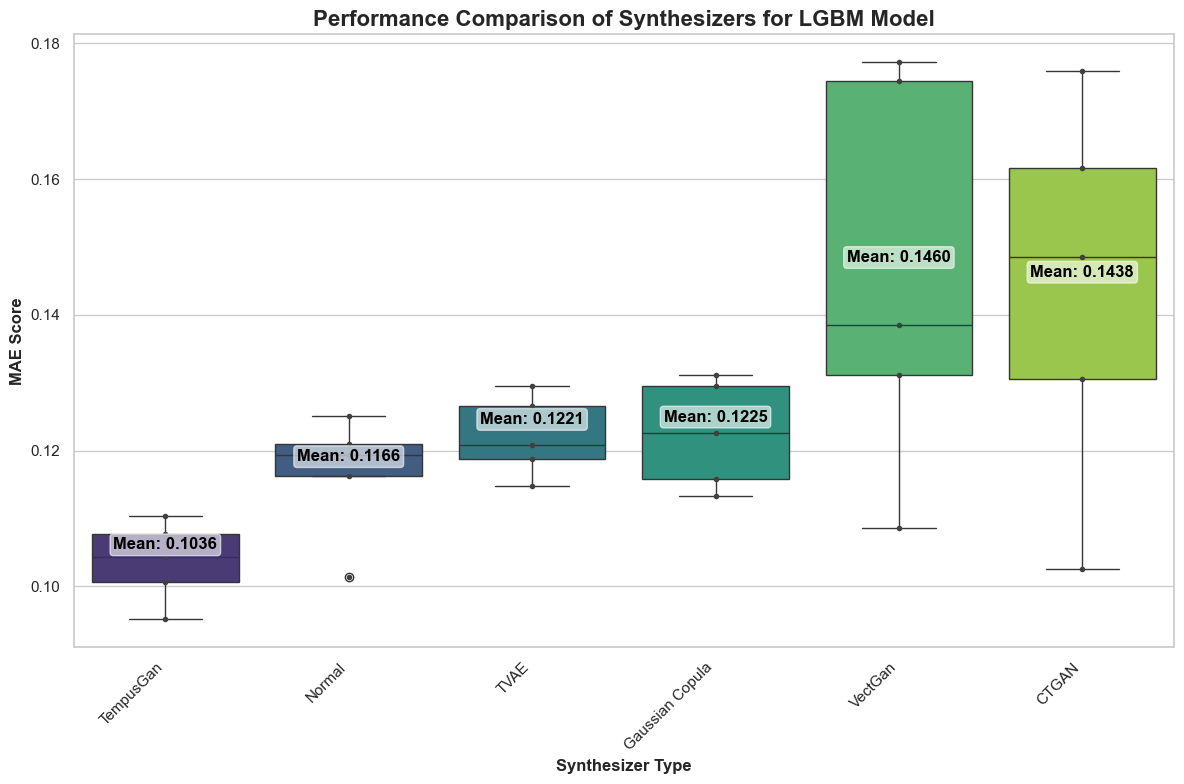

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuration ---
input_filename = 'all_nested_cv_results_few.csv'
model_to_plot = 'LGBM'
metric_column = 'Test Score'
output_plot_filename = 'lgbm_performance_boxplot.png'

# --- Data Loading and Preparation ---
try:
    # Load the full results dataset
    df = pd.read_csv(input_filename)
    
    # Filter the DataFrame to only include results for the specified model
    df_filtered = df[df['Model'] == model_to_plot].copy()

    if df_filtered.empty:
        raise ValueError(f"No data found for model '{model_to_plot}'. Please check the 'Model' column in your CSV.")
    
    print(f"Successfully loaded and filtered data for {model_to_plot} model.")

except FileNotFoundError:
    print(f"FATAL ERROR: The file '{input_filename}' was not found. Please ensure it's in the same directory.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- Plotting ---
# Set a professional plot style
sns.set_theme(style="whitegrid")

# Create the figure and axes for the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
# We order the synthesizers by their median performance for a cleaner look
order = df_filtered.groupby('Synth_Type')[metric_column].median().sort_values().index
ax = sns.boxplot(
    x='Synth_Type',
    y=metric_column,
    data=df_filtered,
    order=order,
    palette="viridis",
    showfliers=True  # Show outliers
)

# Overlay a swarm plot for better visibility of individual data points
sns.swarmplot(
    x='Synth_Type',
    y=metric_column,
    data=df_filtered,
    order=order,
    color="0.25",
    size=4
)

# --- Calculate and Annotate Mean Values ---
# Calculate the mean for each group
mean_values = df_filtered.groupby('Synth_Type')[metric_column].mean()

# Get the y-axis limits to position the text
ymin, ymax = ax.get_ylim()

# Add text annotations for the mean values just above the boxes
for i, synth_type in enumerate(order):
    mean_val = mean_values[synth_type]
    plt.text(
        i,
        # Position the text slightly above the mean value marker for visibility
        mean_val + (ymax * 0.01), 
        f'Mean: {mean_val:.4f}',
        horizontalalignment='center',
        size='medium',
        color='black',
        weight='semibold',
        bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2')
    )

# --- Final Plot Customization ---
# Set plot titles and labels for clarity
plt.title(f'Performance Comparison of Synthesizers for {model_to_plot} Model', fontsize=16, weight='bold')
plt.xlabel('Synthesizer Type', fontsize=12, weight='bold')
plt.ylabel('MAE Score', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Save the plot to a file
plt.savefig(output_plot_filename, dpi=300)

print(f"\nBox plot successfully generated and saved as '{output_plot_filename}'")

# Display the plot
plt.show()

Step 1: Loading and preprocessing real data...
Loaded 3783 real data points.

Step 2: Training synthesizers and generating data...

Training TempusGan...
[TempusGan] Using device: cuda
Epoch 1/200 | D Loss: -0.1436 | G Adv Loss: 0.3455 | VAE Loss: 1.8110
Epoch 10/200 | D Loss: -3.8702 | G Adv Loss: -0.2072 | VAE Loss: 1.6755
Epoch 20/200 | D Loss: -4.7788 | G Adv Loss: -1.4402 | VAE Loss: 1.4056
Epoch 30/200 | D Loss: -5.0451 | G Adv Loss: -2.4342 | VAE Loss: 1.4426
Epoch 40/200 | D Loss: -4.8308 | G Adv Loss: -3.1646 | VAE Loss: 1.3153
Epoch 50/200 | D Loss: -5.2107 | G Adv Loss: -4.1161 | VAE Loss: 1.2504
Epoch 60/200 | D Loss: -4.9402 | G Adv Loss: -4.4751 | VAE Loss: 1.2274
Epoch 70/200 | D Loss: -5.2531 | G Adv Loss: -4.3992 | VAE Loss: 1.2728
Epoch 80/200 | D Loss: -4.8974 | G Adv Loss: -4.4352 | VAE Loss: 1.3302
Epoch 90/200 | D Loss: -5.1043 | G Adv Loss: -4.2275 | VAE Loss: 1.1626
Epoch 100/200 | D Loss: -5.4187 | G Adv Loss: -5.3750 | VAE Loss: 1.3032
Epoch 110/200 | D Loss: 

Fitting data transformer: 100%|████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.16it/s]


VectGan training and sampling complete.

Training CTGAN...


C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



CTGAN training and sampling complete.

Training Gaussian Copula...


C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:163: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:129: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Gaussian Copula training and sampling complete.

Training TVAE...


C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:163: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



TVAE training and sampling complete.

Step 3: Combining all data for visualization...

Step 4a: Performing PCA...
PCA explained variance: 0.36
Step 4b: Performing t-SNE (this may take a moment)...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 22698 samples in 0.001s...
[t-SNE] Computed neighbors for 22698 samples in 0.402s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22698
[t-SNE] Computed conditional probabilities for sample 2000 / 22698
[t-SNE] Computed conditional probabilities for sample 3000 / 22698
[t-SNE] Computed conditional probabilities for sample 4000 / 22698
[t-SNE] Computed conditional probabilities for sample 5000 / 22698
[t-SNE] Computed conditional probabilities for sample 6000 / 22698
[t-SNE] Computed conditional probabilities for sample 7000 / 22698
[t-SNE] Computed conditional probabilities for sample 8000 / 22698
[t-SNE] Computed conditional probabilities for sample 9000 / 22698
[t-SNE] Computed conditional probabilities for sample 10

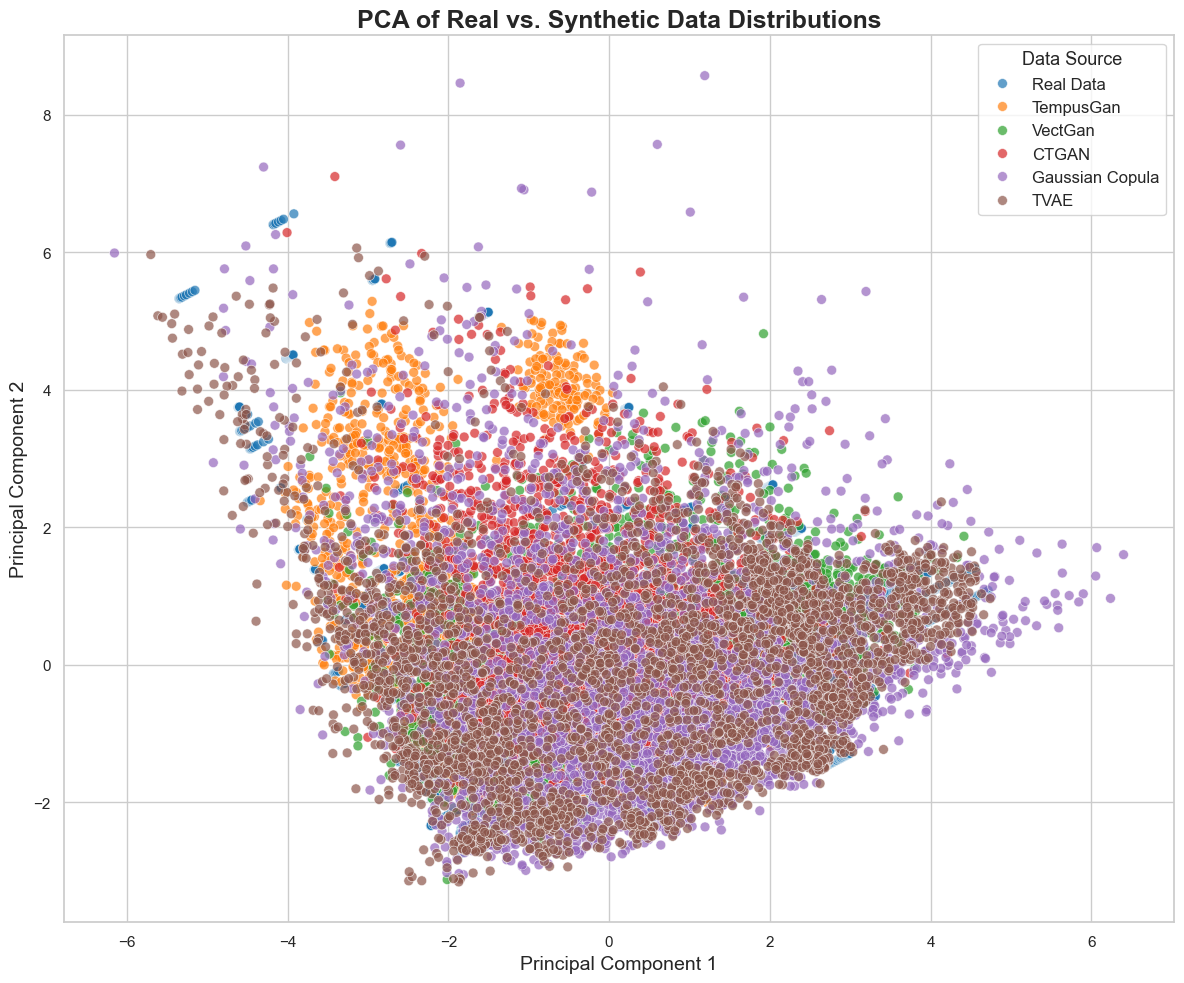

t-SNE plot saved as 'data_distribution_tsne.png'


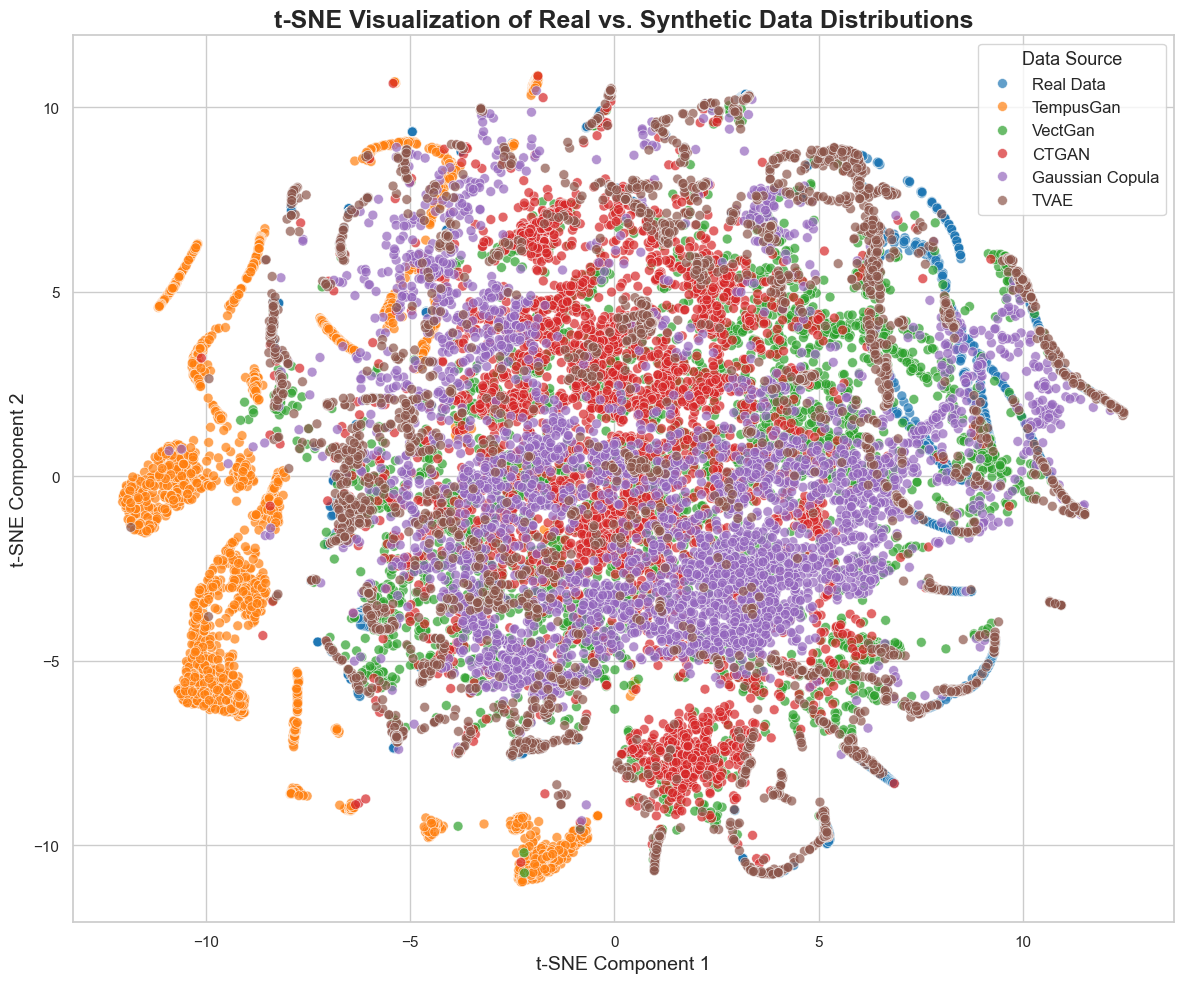

In [1]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import autograd
from torch.utils.data import DataLoader, TensorDataset # <-- ADDED THIS LINE

# --- Import ML and Data Synthesis Libraries ---
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Import Synthesizer Classes ---
from sdv.single_table import GaussianCopulaSynthesizer, TVAESynthesizer
from sdv.metadata.single_table import SingleTableMetadata
from ctgan import CTGAN
from vect_gan.synthesizers.vectgan import VectGan

# --- TempusGan Class Definition ---
class TempusGan:
    def __init__(
        self,
        hidden_dim=128,
        latent_dim=64,
        num_layers=2,
        nhead=4,
        batch_size=64,
        epochs=200,
        encoder_lr=1e-4,
        decoder_lr=1e-4,
        discriminator_lr=2e-4,
        lr_step_size=20,
        lr_gamma=.75,
        device=None
    ):
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.num_layers = num_layers
        self.nhead = nhead
        self.batch_size = batch_size
        self.epochs = epochs
        self.encoder_lr = encoder_lr
        self.decoder_lr = decoder_lr
        self.discriminator_lr = discriminator_lr
        self.lr_step_size = lr_step_size
        self.lr_gamma = lr_gamma

        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"[TempusGan] Using device: {self.device}")
        self.trained = False

    def _preprocess(self, df, discrete_columns, is_fit_call=False):
        if is_fit_call:
            self.discrete_columns = list(discrete_columns)
            self.continuous_columns = [c for c in df.columns if c not in self.discrete_columns]
            self.original_columns = list(df.columns)
            self.onehot_encoders = {}
            self.discrete_column_indices = {}
            self.scaler = StandardScaler() if self.continuous_columns else None
            self.original_discrete_data = (
                df[self.discrete_columns].copy() if self.discrete_columns else pd.DataFrame()
            )

        discrete_data_list, start_idx = [], 0
        for col in self.discrete_columns:
            if is_fit_call:
                ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
                discrete_col = ohe.fit_transform(df[[col]].values)
                self.onehot_encoders[col] = ohe
                self.discrete_column_indices[col] = (start_idx, start_idx + discrete_col.shape[1])
                start_idx += discrete_col.shape[1]
            else:
                discrete_col = self.onehot_encoders[col].transform(df[[col]].values)
            discrete_data_list.append(discrete_col.astype(np.float32))

        discrete_data = (
            np.concatenate(discrete_data_list, axis=1).astype(np.float32)
            if discrete_data_list
            else np.zeros((len(df), 0), dtype=np.float32)
        )
        if is_fit_call:
            self.discrete_dim = discrete_data.shape[1]

        if self.continuous_columns:
            continuous_data = df[self.continuous_columns].values.astype(np.float32)
            if is_fit_call:
                continuous_data = self.scaler.fit_transform(continuous_data)
            else:
                continuous_data = self.scaler.transform(continuous_data)
        else:
            continuous_data = np.zeros((len(df), 0), dtype=np.float32)

        if is_fit_call:
            self.continuous_dim = continuous_data.shape[1]

        all_data = np.concatenate([discrete_data, continuous_data], axis=1).astype(np.float32)
        if is_fit_call:
            self.data_dim = all_data.shape[1]

        return all_data

    def _inverse_transform(self, X):
        out_df = pd.DataFrame()
        for col in self.discrete_columns:
            start_idx, end_idx = self.discrete_column_indices[col]
            one_hot_slice = np.zeros((X.shape[0], end_idx - start_idx))
            one_hot_slice[np.arange(X.shape[0]), X[:, start_idx:end_idx].argmax(1)] = 1
            inv_data = self.onehot_encoders[col].inverse_transform(one_hot_slice)
            out_df[col] = inv_data.flatten()

        if self.continuous_columns:
            continuous_start = self.discrete_dim
            inv_cont_data = self.scaler.inverse_transform(X[:, continuous_start:])
            for i, col in enumerate(self.continuous_columns):
                out_df[col] = inv_cont_data[:, i]

        return out_df[self.original_columns]

    def _sample_realistic_conditions(self, n_samples):
        if self.discrete_dim == 0:
            return torch.zeros(n_samples, 0, device=self.device)
        if len(self.original_discrete_data) > 0:
            idx = np.random.choice(len(self.original_discrete_data), n_samples, replace=True)
            sampled = self.original_discrete_data.iloc[idx].reset_index(drop=True)
            parts = [
                self.onehot_encoders[col].transform(sampled[[col]].values).astype(np.float32)
                for col in self.discrete_columns
            ]
            arr = np.concatenate(parts, axis=1)
            return torch.tensor(arr, device=self.device, dtype=torch.float32)
        return torch.zeros(n_samples, self.discrete_dim, device=self.device)

    class _LinearAttention(nn.Module):
        def __init__(self, d_model, nhead, dropout=0.1):
            super().__init__()
            self.d_head = d_model // nhead
            self.nhead = nhead
            self.qkv_proj = nn.Linear(d_model, d_model * 3)
            self.out_proj = nn.Linear(d_model, d_model)
            self.dropout = nn.Dropout(dropout)
        @staticmethod
        def _phi(x): return F.elu(x) + 1.0 # F needs to be imported
        def forward(self, x):
            B, L, H = x.shape
            q, k, v = self.qkv_proj(x).chunk(3, dim=-1)
            q, k, v = (t.view(B, L, self.nhead, self.d_head).transpose(1, 2) for t in (q, k, v))
            q, k = self._phi(q), self._phi(k)
            kv = torch.einsum('bhld,bhle->bhde', k, v)
            k_sum = k.sum(dim=2)
            z = 1.0 / (torch.einsum('bhld,bhd->bhl', q, k_sum).unsqueeze(-1) + 1e-6)
            out = torch.einsum('bhld,bhde->bhle', q, kv) * z
            out = out.transpose(1, 2).contiguous().view(B, L, H)
            return self.out_proj(self.dropout(out))

    class _LATEncoderLayer(nn.Module):
        def __init__(self, d_model, nhead, mlp_ratio=4, dropout=0.1):
            super().__init__()
            self.attn = TempusGan._LinearAttention(d_model, nhead, dropout=dropout)
            self.ln1 = nn.LayerNorm(d_model)
            self.ff = nn.Sequential(
                nn.Linear(d_model, mlp_ratio * d_model), nn.GELU(), nn.Dropout(dropout),
                nn.Linear(mlp_ratio * d_model, d_model), nn.Dropout(dropout),
            )
            self.ln2 = nn.LayerNorm(d_model)
        def forward(self, x):
            x = x + self.attn(self.ln1(x))
            return x + self.ff(self.ln2(x))

    class _LATransformer(nn.Module):
        def __init__(self, d_model, nhead, num_layers=2, dropout=0.1):
            super().__init__()
            self.layers = nn.ModuleList(
                [TempusGan._LATEncoderLayer(d_model, nhead, dropout=dropout) for _ in range(num_layers)]
            )
        def forward(self, x):
            for layer in self.layers: x = layer(x)
            return x

    class LSTMBlock(nn.Module):
        def __init__(self, input_dim, hidden_dim, dropout_p=0.1):
            super().__init__()
            self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=False)
            self.proj = nn.Linear(hidden_dim, hidden_dim)
            self.bn = nn.BatchNorm1d(hidden_dim)
        def forward(self, x):
            h, _ = self.lstm(x)
            h = F.gelu(self.proj(h)) # F needs to be imported
            return self.bn(h.transpose(1, 2)).transpose(1, 2)

    class Encoder(nn.Module):
        def __init__(self, input_dim, hidden_dim, latent_dim, num_layers, nhead):
            super().__init__()
            self.embed = nn.Linear(1, hidden_dim)
            self.lstm = TempusGan.LSTMBlock(hidden_dim, hidden_dim)
            self.xfmr = TempusGan._LATransformer(hidden_dim, nhead, num_layers=2)
            self.norm = nn.LayerNorm(hidden_dim)
            self.pool = nn.AdaptiveAvgPool1d(1)
            self.fc_mu = nn.Linear(hidden_dim, latent_dim)
            self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        def forward(self, x):
            h = self.embed(x.transpose(1, 2))
            h = self.lstm(h)
            h = self.xfmr(h)
            h = self.pool(self.norm(h).transpose(1, 2)).squeeze(-1)
            return self.fc_mu(h), self.fc_logvar(h)

    class Decoder(nn.Module):
        def __init__(self, latent_dim, hidden_dim, output_dim, num_layers, nhead, cond_dim):
            super().__init__()
            self.output_dim = output_dim
            self.hidden_dim = hidden_dim
            self.token_len = max(8, min(128, output_dim // 4))
            self.fc = nn.Sequential(
                nn.Linear(latent_dim + cond_dim, hidden_dim * self.token_len), nn.GELU()
            )
            self.xfmr = TempusGan._LATransformer(hidden_dim, nhead, num_layers=2)
            self.lstm = TempusGan.LSTMBlock(hidden_dim, hidden_dim)
            self.norm = nn.LayerNorm(hidden_dim)
            self.to_feat = nn.Conv1d(hidden_dim, 1, kernel_size=1)
        def forward(self, z, cond):
            zc = torch.cat([z, cond], dim=1) if cond.shape[1] > 0 else z
            h = self.fc(zc).view(-1, self.token_len, self.hidden_dim)
            h = self.xfmr(h)
            h = self.lstm(h)
            h = F.interpolate(self.norm(h).transpose(1, 2), size=self.output_dim, mode='linear') # F needs to be imported
            return self.to_feat(h)

    class Discriminator(nn.Module):
        def __init__(self, input_dim, hidden_dim, cond_dim):
            super().__init__()
            self.model = nn.Sequential(
                nn.Linear(input_dim + cond_dim, hidden_dim), nn.LeakyReLU(0.2),
                nn.Linear(hidden_dim, hidden_dim // 2), nn.LeakyReLU(0.2),
                nn.Linear(hidden_dim // 2, 1),
            )
        def forward(self, x, cond):
            x_cond = torch.cat([x, cond], dim=1) if cond.shape[1] > 0 else x
            return self.model(x_cond)

    def fit(self, train_data, discrete_columns=[]):
        X = self._preprocess(train_data, discrete_columns, is_fit_call=True)
        dataset = TensorDataset(torch.tensor(X, dtype=torch.float32))
        loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True, drop_last=True)

        self.encoder = self.Encoder(self.data_dim, self.hidden_dim, self.latent_dim, self.num_layers, self.nhead).to(self.device)
        self.decoder = self.Decoder(self.latent_dim, self.hidden_dim, self.data_dim, self.num_layers, self.nhead, self.discrete_dim).to(self.device)
        self.discriminator = self.Discriminator(self.data_dim, self.hidden_dim, self.discrete_dim).to(self.device)

        opt_e = optim.Adam(self.encoder.parameters(), lr=self.encoder_lr)
        opt_d = optim.Adam(self.decoder.parameters(), lr=self.decoder_lr)
        opt_disc = optim.Adam(self.discriminator.parameters(), lr=self.discriminator_lr)

        sch_e = optim.lr_scheduler.StepLR(opt_e, step_size=self.lr_step_size, gamma=self.lr_gamma)
        sch_d = optim.lr_scheduler.StepLR(opt_d, step_size=self.lr_step_size, gamma=self.lr_gamma)
        sch_disc = optim.lr_scheduler.StepLR(opt_disc, step_size=self.lr_step_size, gamma=self.lr_gamma)

        critic_iter = 5
        gp_lambda = 10

        for epoch in range(self.epochs):
            for i, (x_batch,) in enumerate(loader):
                x = x_batch.to(self.device)
                B = x.size(0)
                x_seq = x.unsqueeze(1)
                cond_vec = x[:, :self.discrete_dim] if self.discrete_dim > 0 else torch.zeros(B, 0, device=self.device)
                opt_disc.zero_grad()
                d_real = self.discriminator(x, cond_vec)
                with torch.no_grad():
                    z_fake = torch.randn(B, self.latent_dim, device=self.device)
                    cond_fake = self._sample_realistic_conditions(B)
                    x_fake = self.decoder(z_fake, cond_fake).squeeze(1).detach()
                d_fake = self.discriminator(x_fake, cond_vec)
                alpha = torch.rand(B, 1, device=self.device)
                x_hat = (alpha * x.data + (1 - alpha) * x_fake.data).requires_grad_(True)
                d_hat = self.discriminator(x_hat, cond_vec)
                gradients = autograd.grad(outputs=d_hat.sum(), inputs=x_hat, create_graph=True)[0]
                gradient_penalty = gp_lambda * ((gradients.view(B, -1).norm(2, dim=1) - 1) ** 2).mean()
                d_loss = torch.mean(d_fake) - torch.mean(d_real) + gradient_penalty
                d_loss.backward()
                opt_disc.step()
                if i % critic_iter == 0:
                    opt_e.zero_grad()
                    opt_d.zero_grad()
                    mu, logvar = self.encoder(x_seq)
                    z = mu + torch.randn_like(mu) * torch.exp(0.5 * logvar)
                    x_rec = self.decoder(z, cond_vec).squeeze(1)
                    recon_loss = 0.0
                    if self.discrete_dim > 0:
                        recon_loss += F.binary_cross_entropy_with_logits(x_rec[:, :self.discrete_dim], x[:, :self.discrete_dim])
                    if self.continuous_dim > 0:
                        recon_loss += F.mse_loss(x_rec[:, self.discrete_dim:], x[:, self.discrete_dim:])
                    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / B
                    vae_loss = recon_loss + 0.1 * kl_loss
                    z_fake_g = torch.randn(B, self.latent_dim, device=self.device)
                    cond_fake_g = self._sample_realistic_conditions(B)
                    x_fake_g = self.decoder(z_fake_g, cond_fake_g).squeeze(1)
                    g_adv_loss = -self.discriminator(x_fake_g, cond_fake_g).mean()
                    total_g_loss = vae_loss + 0.1 * g_adv_loss
                    total_g_loss.backward()
                    opt_e.step()
                    opt_d.step()
            sch_e.step()
            sch_d.step()
            sch_disc.step()
            if (epoch + 1) % 10 == 0 or epoch == 0:
                print(
                    f"Epoch {epoch+1}/{self.epochs} | D Loss: {d_loss.item():.4f} | G Adv Loss: {g_adv_loss.item():.4f} | VAE Loss: {vae_loss.item():.4f}"
                )
        self.trained = True

    def sample(self, n=100):
        if not self.trained:
            raise RuntimeError("Model must be trained first.")
        self.decoder.eval()
        self.discriminator.eval()
        m = int(n * 3)
        print(f"Generating {n} synthetic samples (oversample-and-rank strategy)...")
        with torch.no_grad():
            z = torch.randn(m, self.latent_dim, device=self.device)
            cond_samples = self._sample_realistic_conditions(m)
            x_gen = self.decoder(z, cond_samples).squeeze(1)
            scores = self.discriminator(x_gen, cond_samples).squeeze()
            _, top_indices = torch.topk(scores, n)
            x_best = x_gen[top_indices]
        return self._inverse_transform(x_best.cpu().numpy())

def generate_and_plot():
    """
    Main function to generate synthetic data from various models and visualize the results
    using PCA and t-SNE.
    """
    # --- 0. Set Seed for Reproducibility ---
    seed = 0
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    # --- 1. Load and Prepare Real Data ---
    print("Step 1: Loading and preprocessing real data...")
    try:
        real_df = pd.read_excel("few_shot_models/Dataset_17_feat.xlsx")
    except FileNotFoundError:
        print("ERROR: 'few_shot_models/Dataset_17_feat.xlsx' not found.")
        print("Please make sure the dataset file is in the correct directory.")
        return

    # Keep only the feature columns for dimensionality reduction
    feature_cols = [col for col in real_df.columns if col not in ['Experimental_index', 'DP_Group', 'Release']]
    real_features = real_df[feature_cols]
    
    # Scale the features
    scaler = StandardScaler()
    real_features_scaled = scaler.fit_transform(real_features)
    
    num_samples = len(real_df)
    print(f"Loaded {num_samples} real data points.")

    # --- 2. Train Synthesizers and Generate Data ---
    print("\nStep 2: Training synthesizers and generating data...")
    
    # Prepare data for synthesizers that need categorical columns
    sd_train = real_df.copy()
    discrete_cols = ["DP_Group", "Experimental_index"]
    for col in discrete_cols:
        sd_train[col] = sd_train[col].astype(str)

    # Dictionary to hold the generated data
    synthetic_data = {}

    # a) TempusGan
    print("\nTraining TempusGan...")
    tempus_gan = TempusGan(epochs=200) # Using LAI dataset parameters
    tempus_gan.fit(sd_train, discrete_columns=discrete_cols)
    synthetic_data['TempusGan'] = tempus_gan.sample(n=num_samples)
    print("TempusGan training and sampling complete.")

    # b) VectGan
    print("\nTraining VectGan...")
    vect_gan = VectGan(batch_size=64, pac=8, epochs=30, verbose=False)
    vect_gan.fit(train_data=sd_train, discrete_columns=discrete_cols)
    synthetic_data['VectGan'] = vect_gan.sample(n=num_samples)
    print("VectGan training and sampling complete.")

    # c) CTGAN
    print("\nTraining CTGAN...")
    ctgan = CTGAN(epochs=30, verbose=False)
    ctgan.fit(sd_train, discrete_columns=discrete_cols)
    synthetic_data['CTGAN'] = ctgan.sample(num_samples)
    print("CTGAN training and sampling complete.")

    # d) Gaussian Copula
    print("\nTraining Gaussian Copula...")
    meta = SingleTableMetadata()
    meta.detect_from_dataframe(sd_train)
    for col in discrete_cols:
        meta.update_column(col, sdtype="categorical")
    gc = GaussianCopulaSynthesizer(metadata=meta)
    gc.fit(sd_train)
    synthetic_data['Gaussian Copula'] = gc.sample(num_rows=num_samples)
    print("Gaussian Copula training and sampling complete.")
    
    # e) TVAE
    print("\nTraining TVAE...")
    tvae = TVAESynthesizer(metadata=meta) # Re-use metadata
    tvae.fit(sd_train)
    synthetic_data['TVAE'] = tvae.sample(num_rows=num_samples)
    print("TVAE training and sampling complete.")

    # --- 3. Combine and Prepare Data for Plotting ---
    print("\nStep 3: Combining all data for visualization...")
    
    # Create a list of dataframes to combine
    all_dfs = [pd.DataFrame(real_features_scaled, columns=feature_cols)]
    all_dfs[0]['Source'] = 'Real Data'
    
    for name, df_syn in synthetic_data.items():
        syn_features_scaled = scaler.transform(df_syn[feature_cols])
        df_to_add = pd.DataFrame(syn_features_scaled, columns=feature_cols)
        df_to_add['Source'] = name
        all_dfs.append(df_to_add)

    # Concatenate all data into a single dataframe
    combined_df = pd.concat(all_dfs, ignore_index=True)
    features_for_reduction = combined_df.drop('Source', axis=1)

    # --- 4. Perform Dimensionality Reduction ---
    # a) PCA
    print("\nStep 4a: Performing PCA...")
    pca = PCA(n_components=2, random_state=seed)
    pca_result = pca.fit_transform(features_for_reduction)
    combined_df['PCA1'] = pca_result[:, 0]
    combined_df['PCA2'] = pca_result[:, 1]
    print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.2f}")

    # b) t-SNE
    print("Step 4b: Performing t-SNE (this may take a moment)...")
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=300, random_state=seed)
    tsne_result = tsne.fit_transform(features_for_reduction)
    combined_df['t-SNE1'] = tsne_result[:, 0]
    combined_df['t-SNE2'] = tsne_result[:, 1]

    # --- 5. Generate and Save Plots ---
    print("\nStep 5: Generating and saving plots...")
    
    # Define a consistent color palette and style
    sns.set_theme(style="whitegrid")
    palette = {
        'Real Data': '#1f77b4', 'TempusGan': '#ff7f0e', 'VectGan': '#2ca02c',
        'CTGAN': '#d62728', 'Gaussian Copula': '#9467bd', 'TVAE': '#8c564b'
    }

    # Plot PCA results
    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x="PCA1", y="PCA2",
        hue="Source",
        palette=palette,
        data=combined_df,
        alpha=0.7,
        s=50, # Adjust marker size
        edgecolor="w", # Add a white edge to markers for clarity
        linewidth=0.5
    )
    plt.title('PCA of Real vs. Synthetic Data Distributions', fontsize=18, weight='bold')
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='Data Source', fontsize=12, title_fontsize=13)
    plt.tight_layout()
    pca_filename = 'data_distribution_pca.png'
    plt.savefig(pca_filename, dpi=300)
    print(f"PCA plot saved as '{pca_filename}'")
    plt.show()

    # Plot t-SNE results
    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x="t-SNE1", y="t-SNE2",
        hue="Source",
        palette=palette,
        data=combined_df,
        alpha=0.7,
        s=50,
        edgecolor="w",
        linewidth=0.5
    )
    plt.title('t-SNE Visualization of Real vs. Synthetic Data Distributions', fontsize=18, weight='bold')
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)
    plt.legend(title='Data Source', fontsize=12, title_fontsize=13)
    plt.tight_layout()
    tsne_filename = 'data_distribution_tsne.png'
    plt.savefig(tsne_filename, dpi=300)
    print(f"t-SNE plot saved as '{tsne_filename}'")
    plt.show()

if __name__ == "__main__":
    generate_and_plot()

Step 1: Finding best LGBM hyperparameters...
Found best parameters from Iteration 1 (Synth: TempusGan):
{'subsample': 1.0, 'reg_lambda': 0.005, 'reg_alpha': 0, 'num_leaves': 32, 'n_estimators': 200, 'min_child_weight': 1.0, 'min_child_samples': 10, 'learning_rate': 0.1, 'boosting_type': 'gbdt'}

Step 2: Creating a reproducible train/test split...
Train set size: 3463, Test set size: 320

Step 3: Training models and predicting...

--- Processing: TempusGan ---
[TempusGan] Using device: cuda
Epoch 1/200 | D Loss: 0.6721 | G Adv Loss: -0.1333 | VAE Loss: 1.8465
Epoch 10/200 | D Loss: -3.4963 | G Adv Loss: -0.2903 | VAE Loss: 1.5011
Epoch 20/200 | D Loss: -4.2922 | G Adv Loss: -0.9318 | VAE Loss: 1.4077
Epoch 30/200 | D Loss: -4.6554 | G Adv Loss: -1.9236 | VAE Loss: 1.4142
Epoch 40/200 | D Loss: -5.0257 | G Adv Loss: -2.2413 | VAE Loss: 1.3304
Epoch 50/200 | D Loss: -4.9911 | G Adv Loss: -2.5521 | VAE Loss: 1.2108
Epoch 60/200 | D Loss: -5.0788 | G Adv Loss: -2.7148 | VAE Loss: 1.3280
Epo

C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



Prediction complete.

--- Processing: Normal ---
Training LGBM on 'Normal' data...
Prediction complete.

--- Processing: VectGan ---


Fitting data transformer: 100%|████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.58it/s]


Training LGBM on 'VectGan' data...
Prediction complete.

--- Processing: CTGAN ---


C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Training LGBM on 'CTGAN' data...
Prediction complete.

--- Processing: Gaussian Copula ---


C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:163: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:129: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Training LGBM on 'Gaussian Copula' data...
Prediction complete.

--- Processing: TVAE ---


C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:163: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:129: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Training LGBM on 'TVAE' data...
Prediction complete.

Step 4: Identifying profiles with the largest improvement from TempusGan...

Step 5: Generating and saving plots...
Plotting profiles for Experimental Indices where TempusGan shows the most improvement: [105, 10]


C:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



Plot saved as 'Figures/LAI_Advantage_Profiles/Advantage_Profile_1_Exp105.png'


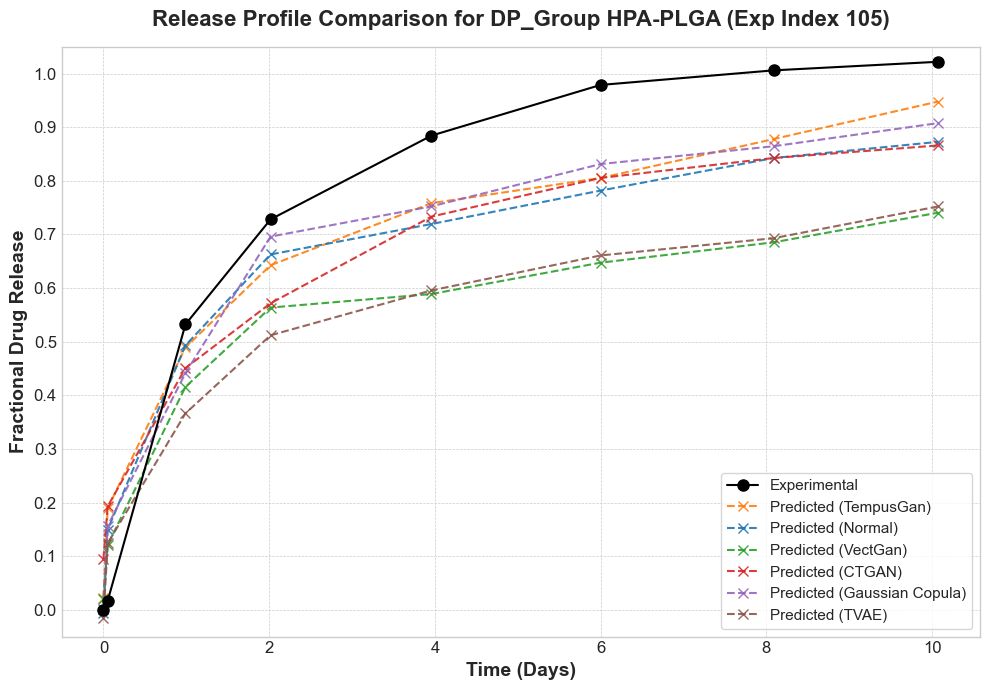

Plot saved as 'Figures/LAI_Advantage_Profiles/Advantage_Profile_2_Exp10.png'


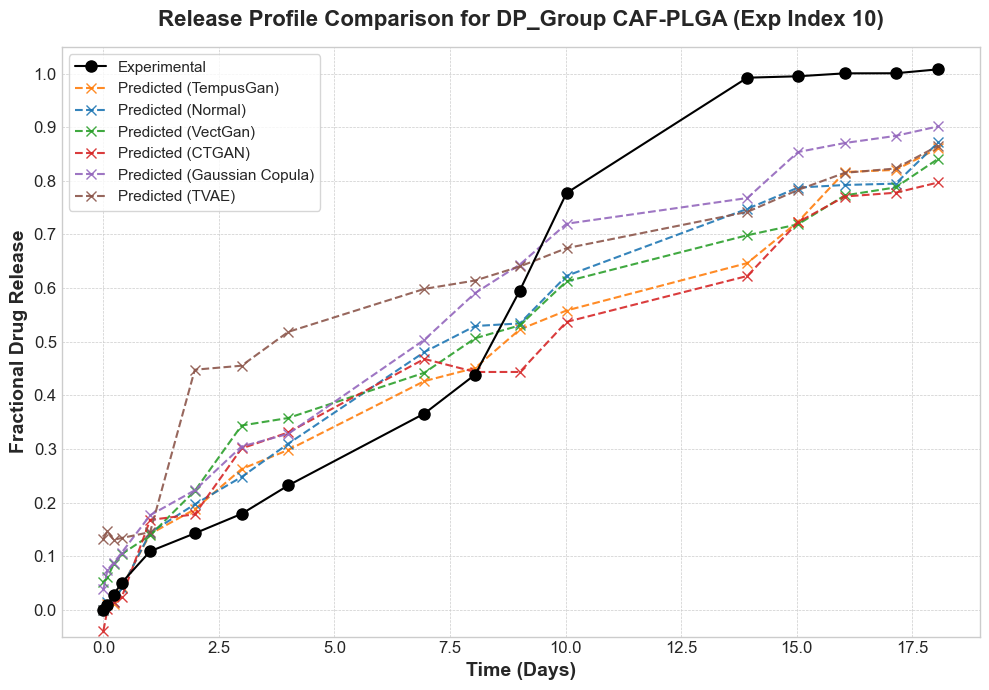

In [1]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import autograd
from torch.utils.data import DataLoader, TensorDataset
import ast

# --- Import ML and Data Synthesis Libraries ---
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

# --- Import Synthesizer Classes ---
from sdv.single_table import GaussianCopulaSynthesizer, TVAESynthesizer
from sdv.metadata.single_table import SingleTableMetadata
from ctgan import CTGAN
from vect_gan.synthesizers.vectgan import VectGan

# --- TempusGan Class Definition ---
class TempusGan:
    def __init__(
        self,
        hidden_dim=128,
        latent_dim=64,
        num_layers=2,
        nhead=4,
        batch_size=64,
        epochs=200,
        encoder_lr=1e-4,
        decoder_lr=1e-4,
        discriminator_lr=2e-4,
        lr_step_size=20,
        lr_gamma=.75,
        device=None
    ):
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.num_layers = num_layers
        self.nhead = nhead
        self.batch_size = batch_size
        self.epochs = epochs
        self.encoder_lr = encoder_lr
        self.decoder_lr = decoder_lr
        self.discriminator_lr = discriminator_lr
        self.lr_step_size = lr_step_size
        self.lr_gamma = lr_gamma
        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"[TempusGan] Using device: {self.device}")
        self.trained = False

    def _preprocess(self, df, discrete_columns, is_fit_call=False):
        if is_fit_call:
            self.discrete_columns = list(discrete_columns)
            self.continuous_columns = [c for c in df.columns if c not in self.discrete_columns]
            self.original_columns = list(df.columns)
            self.onehot_encoders = {}
            self.discrete_column_indices = {}
            self.scaler = StandardScaler() if self.continuous_columns else None
            self.original_discrete_data = (
                df[self.discrete_columns].copy() if self.discrete_columns else pd.DataFrame()
            )
        discrete_data_list, start_idx = [], 0
        for col in self.discrete_columns:
            if is_fit_call:
                ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
                discrete_col = ohe.fit_transform(df[[col]].values)
                self.onehot_encoders[col] = ohe
                self.discrete_column_indices[col] = (start_idx, start_idx + discrete_col.shape[1])
                start_idx += discrete_col.shape[1]
            else:
                discrete_col = self.onehot_encoders[col].transform(df[[col]].values)
            discrete_data_list.append(discrete_col.astype(np.float32))
        discrete_data = (
            np.concatenate(discrete_data_list, axis=1).astype(np.float32)
            if discrete_data_list
            else np.zeros((len(df), 0), dtype=np.float32)
        )
        if is_fit_call: self.discrete_dim = discrete_data.shape[1]
        if self.continuous_columns:
            continuous_data = df[self.continuous_columns].values.astype(np.float32)
            if is_fit_call: continuous_data = self.scaler.fit_transform(continuous_data)
            else: continuous_data = self.scaler.transform(continuous_data)
        else: continuous_data = np.zeros((len(df), 0), dtype=np.float32)
        if is_fit_call: self.continuous_dim = continuous_data.shape[1]
        all_data = np.concatenate([discrete_data, continuous_data], axis=1).astype(np.float32)
        if is_fit_call: self.data_dim = all_data.shape[1]
        return all_data

    def _inverse_transform(self, X):
        out_df = pd.DataFrame()
        for col in self.discrete_columns:
            start_idx, end_idx = self.discrete_column_indices[col]
            one_hot_slice = np.zeros((X.shape[0], end_idx - start_idx))
            one_hot_slice[np.arange(X.shape[0]), X[:, start_idx:end_idx].argmax(1)] = 1
            inv_data = self.onehot_encoders[col].inverse_transform(one_hot_slice)
            out_df[col] = inv_data.flatten()
        if self.continuous_columns:
            continuous_start = self.discrete_dim
            inv_cont_data = self.scaler.inverse_transform(X[:, continuous_start:])
            for i, col in enumerate(self.continuous_columns):
                out_df[col] = inv_cont_data[:, i]
        return out_df[self.original_columns]

    def _sample_realistic_conditions(self, n_samples):
        if self.discrete_dim == 0: return torch.zeros(n_samples, 0, device=self.device)
        if len(self.original_discrete_data) > 0:
            idx = np.random.choice(len(self.original_discrete_data), n_samples, replace=True)
            sampled = self.original_discrete_data.iloc[idx].reset_index(drop=True)
            parts = [
                self.onehot_encoders[col].transform(sampled[[col]].values).astype(np.float32)
                for col in self.discrete_columns
            ]
            arr = np.concatenate(parts, axis=1)
            return torch.tensor(arr, device=self.device, dtype=torch.float32)
        return torch.zeros(n_samples, self.discrete_dim, device=self.device)

    class _LinearAttention(nn.Module):
        def __init__(self, d_model, nhead, dropout=0.1):
            super().__init__()
            self.d_head = d_model // nhead
            self.nhead = nhead
            self.qkv_proj = nn.Linear(d_model, d_model * 3)
            self.out_proj = nn.Linear(d_model, d_model)
            self.dropout = nn.Dropout(dropout)
        @staticmethod
        def _phi(x): return F.elu(x) + 1.0
        def forward(self, x):
            B, L, H = x.shape
            q, k, v = self.qkv_proj(x).chunk(3, dim=-1)
            q, k, v = (t.view(B, L, self.nhead, self.d_head).transpose(1, 2) for t in (q, k, v))
            q, k = self._phi(q), self._phi(k)
            kv = torch.einsum('bhld,bhle->bhde', k, v)
            k_sum = k.sum(dim=2)
            z = 1.0 / (torch.einsum('bhld,bhd->bhl', q, k_sum).unsqueeze(-1) + 1e-6)
            out = torch.einsum('bhld,bhde->bhle', q, kv) * z
            out = out.transpose(1, 2).contiguous().view(B, L, H)
            return self.out_proj(self.dropout(out))

    class _LATEncoderLayer(nn.Module):
        def __init__(self, d_model, nhead, mlp_ratio=4, dropout=0.1):
            super().__init__()
            self.attn = TempusGan._LinearAttention(d_model, nhead, dropout=dropout)
            self.ln1 = nn.LayerNorm(d_model)
            self.ff = nn.Sequential(
                nn.Linear(d_model, mlp_ratio * d_model), nn.GELU(), nn.Dropout(dropout),
                nn.Linear(mlp_ratio * d_model, d_model), nn.Dropout(dropout),
            )
            self.ln2 = nn.LayerNorm(d_model)
        def forward(self, x):
            x = x + self.attn(self.ln1(x))
            return x + self.ff(self.ln2(x))

    class _LATransformer(nn.Module):
        def __init__(self, d_model, nhead, num_layers=2, dropout=0.1):
            super().__init__()
            self.layers = nn.ModuleList([TempusGan._LATEncoderLayer(d_model, nhead, dropout=dropout) for _ in range(num_layers)])
        def forward(self, x):
            for layer in self.layers: x = layer(x)
            return x

    class LSTMBlock(nn.Module):
        def __init__(self, input_dim, hidden_dim, dropout_p=0.1):
            super().__init__()
            self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True, bidirectional=False)
            self.proj = nn.Linear(hidden_dim, hidden_dim)
            self.bn = nn.BatchNorm1d(hidden_dim)
        def forward(self, x):
            h, _ = self.lstm(x)
            h = F.gelu(self.proj(h))
            return self.bn(h.transpose(1, 2)).transpose(1, 2)

    class Encoder(nn.Module):
        def __init__(self, input_dim, hidden_dim, latent_dim, num_layers, nhead):
            super().__init__()
            self.embed = nn.Linear(1, hidden_dim)
            self.lstm = TempusGan.LSTMBlock(hidden_dim, hidden_dim)
            self.xfmr = TempusGan._LATransformer(hidden_dim, nhead, num_layers=2)
            self.norm = nn.LayerNorm(hidden_dim)
            self.pool = nn.AdaptiveAvgPool1d(1)
            self.fc_mu = nn.Linear(hidden_dim, latent_dim)
            self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        def forward(self, x):
            h = self.embed(x.transpose(1, 2))
            h = self.lstm(h)
            h = self.xfmr(h)
            h = self.pool(self.norm(h).transpose(1, 2)).squeeze(-1)
            return self.fc_mu(h), self.fc_logvar(h)

    class Decoder(nn.Module):
        def __init__(self, latent_dim, hidden_dim, output_dim, num_layers, nhead, cond_dim):
            super().__init__()
            self.output_dim = output_dim
            self.hidden_dim = hidden_dim
            self.token_len = max(8, min(128, output_dim // 4))
            self.fc = nn.Sequential(nn.Linear(latent_dim + cond_dim, hidden_dim * self.token_len), nn.GELU())
            self.xfmr = TempusGan._LATransformer(hidden_dim, nhead, num_layers=2)
            self.lstm = TempusGan.LSTMBlock(hidden_dim, hidden_dim)
            self.norm = nn.LayerNorm(hidden_dim)
            self.to_feat = nn.Conv1d(hidden_dim, 1, kernel_size=1)
        def forward(self, z, cond):
            zc = torch.cat([z, cond], dim=1) if cond.shape[1] > 0 else z
            h = self.fc(zc).view(-1, self.token_len, self.hidden_dim)
            h = self.xfmr(h)
            h = self.lstm(h)
            h = F.interpolate(self.norm(h).transpose(1, 2), size=self.output_dim, mode='linear')
            return self.to_feat(h)

    class Discriminator(nn.Module):
        def __init__(self, input_dim, hidden_dim, cond_dim):
            super().__init__()
            self.model = nn.Sequential(
                nn.Linear(input_dim + cond_dim, hidden_dim), nn.LeakyReLU(0.2),
                nn.Linear(hidden_dim, hidden_dim // 2), nn.LeakyReLU(0.2),
                nn.Linear(hidden_dim // 2, 1),
            )
        def forward(self, x, cond):
            x_cond = torch.cat([x, cond], dim=1) if cond.shape[1] > 0 else x
            return self.model(x_cond)

    def fit(self, train_data, discrete_columns=[]):
        X = self._preprocess(train_data, discrete_columns, is_fit_call=True)
        dataset = TensorDataset(torch.tensor(X, dtype=torch.float32))
        loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True, drop_last=True)
        self.encoder = self.Encoder(self.data_dim, self.hidden_dim, self.latent_dim, self.num_layers, self.nhead).to(self.device)
        self.decoder = self.Decoder(self.latent_dim, self.hidden_dim, self.data_dim, self.num_layers, self.nhead, self.discrete_dim).to(self.device)
        self.discriminator = self.Discriminator(self.data_dim, self.hidden_dim, self.discrete_dim).to(self.device)
        opt_e = optim.Adam(self.encoder.parameters(), lr=self.encoder_lr)
        opt_d = optim.Adam(self.decoder.parameters(), lr=self.decoder_lr)
        opt_disc = optim.Adam(self.discriminator.parameters(), lr=self.discriminator_lr)
        sch_e = optim.lr_scheduler.StepLR(opt_e, step_size=self.lr_step_size, gamma=self.lr_gamma)
        sch_d = optim.lr_scheduler.StepLR(opt_d, step_size=self.lr_step_size, gamma=self.lr_gamma)
        sch_disc = optim.lr_scheduler.StepLR(opt_disc, step_size=self.lr_step_size, gamma=self.lr_gamma)
        critic_iter = 5
        gp_lambda = 10
        for epoch in range(self.epochs):
            for i, (x_batch,) in enumerate(loader):
                x = x_batch.to(self.device)
                B = x.size(0)
                x_seq = x.unsqueeze(1)
                cond_vec = x[:, :self.discrete_dim] if self.discrete_dim > 0 else torch.zeros(B, 0, device=self.device)
                opt_disc.zero_grad()
                d_real = self.discriminator(x, cond_vec)
                with torch.no_grad():
                    z_fake = torch.randn(B, self.latent_dim, device=self.device)
                    cond_fake = self._sample_realistic_conditions(B)
                    x_fake = self.decoder(z_fake, cond_fake).squeeze(1).detach()
                d_fake = self.discriminator(x_fake, cond_vec)
                alpha = torch.rand(B, 1, device=self.device)
                x_hat = (alpha * x.data + (1 - alpha) * x_fake.data).requires_grad_(True)
                d_hat = self.discriminator(x_hat, cond_vec)
                gradients = autograd.grad(outputs=d_hat.sum(), inputs=x_hat, create_graph=True)[0]
                gradient_penalty = gp_lambda * ((gradients.view(B, -1).norm(2, dim=1) - 1) ** 2).mean()
                d_loss = torch.mean(d_fake) - torch.mean(d_real) + gradient_penalty
                d_loss.backward()
                opt_disc.step()
                if i % critic_iter == 0:
                    opt_e.zero_grad(); opt_d.zero_grad()
                    mu, logvar = self.encoder(x_seq)
                    z = mu + torch.randn_like(mu) * torch.exp(0.5 * logvar)
                    x_rec = self.decoder(z, cond_vec).squeeze(1)
                    recon_loss = 0.0
                    if self.discrete_dim > 0: recon_loss += F.binary_cross_entropy_with_logits(x_rec[:, :self.discrete_dim], x[:, :self.discrete_dim])
                    if self.continuous_dim > 0: recon_loss += F.mse_loss(x_rec[:, self.discrete_dim:], x[:, self.discrete_dim:])
                    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / B
                    vae_loss = recon_loss + 0.1 * kl_loss
                    z_fake_g = torch.randn(B, self.latent_dim, device=self.device)
                    cond_fake_g = self._sample_realistic_conditions(B)
                    x_fake_g = self.decoder(z_fake_g, cond_fake_g).squeeze(1)
                    g_adv_loss = -self.discriminator(x_fake_g, cond_fake_g).mean()
                    total_g_loss = vae_loss + 0.1 * g_adv_loss
                    total_g_loss.backward()
                    opt_e.step(); opt_d.step()
            sch_e.step(); sch_d.step(); sch_disc.step()
            if (epoch + 1) % 10 == 0 or epoch == 0:
                print(
                    f"Epoch {epoch+1}/{self.epochs} | D Loss: {d_loss.item():.4f} | G Adv Loss: {g_adv_loss.item():.4f} | VAE Loss: {vae_loss.item():.4f}"
                )
        self.trained = True

    def sample(self, n=100):
        if not self.trained: raise RuntimeError("Model must be trained first.")
        self.decoder.eval(); self.discriminator.eval()
        m = int(n * 3)
        print(f"Generating {n} synthetic samples (oversample-and-rank strategy)...")
        with torch.no_grad():
            z = torch.randn(m, self.latent_dim, device=self.device)
            cond_samples = self._sample_realistic_conditions(m)
            x_gen = self.decoder(z, cond_samples).squeeze(1)
            scores = self.discriminator(x_gen, cond_samples).squeeze()
            _, top_indices = torch.topk(scores, n)
            x_best = x_gen[top_indices]
        return self._inverse_transform(x_best.cpu().numpy())


def plot_release_curves_by_advantage():
    """
    Identifies profiles where TempusGan shows the biggest improvement over competitors
    and generates comparison plots.
    """
    # --- 0. Set Seed and Configuration ---
    SEED = 0
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(SEED)

    SYNTHESIZERS = ['TempusGan', 'Normal', 'VectGan', 'CTGAN', 'Gaussian Copula', 'TVAE']
    DATA_FILE = "few_shot_models/Dataset_17_feat.xlsx"
    RESULTS_FILE = "all_nested_cv_results_few.csv"
    
    # --- 1. Find Best LGBM Hyperparameters from CV Results ---
    print("Step 1: Finding best LGBM hyperparameters...")
    try:
        cv_results_df = pd.read_csv(RESULTS_FILE)
        lgbm_results = cv_results_df[cv_results_df['Model'] == 'LGBM']
        best_run = lgbm_results.loc[lgbm_results['Test Score'].idxmin()]
        best_params_str = best_run['Model Parms']
        best_params = ast.literal_eval(best_params_str)
        print(f"Found best parameters from Iteration {best_run['Iter']} (Synth: {best_run['Synth_Type']}):")
        print(best_params)
    except Exception as e:
        print(f"Error reading or processing '{RESULTS_FILE}': {e}. Exiting.")
        return

    # --- 2. Load and Split Data ---
    print("\nStep 2: Creating a reproducible train/test split...")
    df_lai = pd.read_excel(DATA_FILE)
    X_cols = [col for col in df_lai.columns if col not in ['Experimental_index', 'DP_Group', 'Release']]
    X = df_lai[X_cols]
    Y = df_lai['Release']
    G = df_lai['DP_Group']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
    train_idx, test_idx = next(splitter.split(X_scaled, Y, G))

    X_train_orig, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train_orig = Y.iloc[train_idx]
    
    df_train_orig = df_lai.iloc[train_idx].copy()
    df_test_final = df_lai.iloc[test_idx].copy()
    
    print(f"Train set size: {len(X_train_orig)}, Test set size: {len(X_test)}")
    
    # --- 3. Train Models and Generate Predictions ---
    print("\nStep 3: Training models and predicting...")
    all_predictions = {}
    
    for synth_name in SYNTHESIZERS:
        print(f"\n--- Processing: {synth_name} ---")
        X_train_aug, y_train_aug = X_train_orig, y_train_orig.copy()
        
        if synth_name != 'Normal':
            sd_train = df_train_orig.copy()
            discrete_cols = ["DP_Group", "Experimental_index"]
            for col in discrete_cols:
                sd_train[col] = sd_train[col].astype(str)

            num_syn_samples = int(0.5 * len(df_train_orig))
            
            if synth_name == 'TempusGan':
                synth_model = TempusGan(epochs=200)
                synth_model.fit(sd_train, discrete_columns=discrete_cols)
                syn_data = synth_model.sample(n=num_syn_samples)
            elif synth_name == 'VectGan':
                synth_model = VectGan(batch_size=64, pac=8, epochs=30, verbose=False)
                synth_model.fit(train_data=sd_train, discrete_columns=discrete_cols)
                syn_data = synth_model.sample(n=num_syn_samples)
            elif synth_name == 'CTGAN':
                # Corrected CTGAN call to match user's code style
                synth_model = CTGAN(epochs=30, verbose=False)
                synth_model.fit(sd_train, discrete_columns=discrete_cols)
                syn_data = synth_model.sample(num_syn_samples)
            elif synth_name == 'Gaussian Copula':
                meta = SingleTableMetadata()
                meta.detect_from_dataframe(sd_train)
                for c in discrete_cols: meta.update_column(c, sdtype="categorical")
                synth_model = GaussianCopulaSynthesizer(metadata=meta)
                synth_model.fit(sd_train)
                syn_data = synth_model.sample(num_rows=num_syn_samples)
            elif synth_name == 'TVAE':
                meta = SingleTableMetadata()
                meta.detect_from_dataframe(sd_train)
                for c in discrete_cols: meta.update_column(c, sdtype="categorical")
                synth_model = TVAESynthesizer(metadata=meta, epochs=30)
                synth_model.fit(sd_train)
                syn_data = synth_model.sample(num_rows=num_syn_samples)

            X_syn_scaled = scaler.transform(syn_data[X_cols])
            y_syn = syn_data['Release']
            
            X_train_aug = np.vstack([X_train_orig, X_syn_scaled])
            y_train_aug = pd.concat([y_train_orig, y_syn], ignore_index=True)

        print(f"Training LGBM on '{synth_name}' data...")
        lgbm = LGBMRegressor(**best_params, random_state=SEED, verbosity=-1)
        lgbm.fit(X_train_aug, y_train_aug)
        
        all_predictions[synth_name] = lgbm.predict(X_test)
        print("Prediction complete.")

    # --- 4. Identify Profiles where TempusGan has the Biggest Advantage ---
    print("\nStep 4: Identifying profiles with the largest improvement from TempusGan...")
    
    error_df = df_test_final[['Experimental_index']].copy()
    
    # Calculate absolute error for each model's predictions
    for synth_name, preds in all_predictions.items():
        error_df[f'Abs_Error_{synth_name}'] = (df_test_final['Release'] - preds).abs()

    # Group by profile and calculate MAE for each
    profile_maes = error_df.groupby('Experimental_index').mean()
    
    # Find the best competitor (lowest MAE) for each profile, excluding TempusGan
    competitor_cols = [f'Abs_Error_{s}' for s in SYNTHESIZERS if s != 'TempusGan']
    profile_maes['MAE_Best_Competitor'] = profile_maes[competitor_cols].min(axis=1)
    
    # Calculate the improvement gap
    profile_maes['Improvement_Gap'] = profile_maes['MAE_Best_Competitor'] - profile_maes['Abs_Error_TempusGan']
    
    # Sort to find the profiles where TempusGan's advantage is largest
    profiles_to_plot = profile_maes.sort_values(by='Improvement_Gap', ascending=False).head(2).index.tolist()

    # --- 5. Prepare DataFrame for Plotting and Generate Plots ---
    print("\nStep 5: Generating and saving plots...")
    
    plot_df_list = []
    
    df_test_final_copy = df_test_final.copy()
    df_test_final_copy['Synthesizer'] = 'Experimental'
    df_test_final_copy['Plot_Release'] = df_test_final_copy['Release']
    plot_df_list.append(df_test_final_copy)

    for synth_name, preds in all_predictions.items():
        temp_df = df_test_final.copy()
        temp_df['Synthesizer'] = synth_name
        temp_df['Plot_Release'] = preds
        plot_df_list.append(temp_df)
        
    final_plot_df = pd.concat(plot_df_list, ignore_index=True)
    
    if not profiles_to_plot:
        print("No experimental indices found in the test set. Cannot generate plots.")
        return
        
    print(f"Plotting profiles for Experimental Indices where TempusGan shows the most improvement: {profiles_to_plot}")
    
    palette = {
        'Experimental': 'black', 'TempusGan': '#ff7f0e', 'Normal': '#1f77b4',
        'VectGan': '#2ca02c', 'CTGAN': '#d62728', 'Gaussian Copula': '#9467bd', 'TVAE': '#8c564b'
    }

    for i, exp_index in enumerate(profiles_to_plot):
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax = plt.subplots(figsize=(10, 7))
        
        subset_df = final_plot_df[final_plot_df['Experimental_index'] == exp_index]
        dp_group = subset_df['DP_Group'].iloc[0]
        
        exp_data = subset_df[subset_df['Synthesizer'] == 'Experimental']
        ax.plot(exp_data['Time'], exp_data['Plot_Release'], label='Experimental', linestyle='-', 
                marker='o', markersize=8, color=palette['Experimental'], 
                markeredgecolor="black", zorder=10)

        for synth_name in SYNTHESIZERS:
            synth_data = subset_df[subset_df['Synthesizer'] == synth_name]
            if not synth_data.empty:
                ax.plot(synth_data['Time'], synth_data['Plot_Release'], 
                        label=f'Predicted ({synth_name})', linestyle='--', marker='x', 
                        markersize=7, color=palette[synth_name], alpha=0.9)

        ax.set_ylim(-0.05, 1.05)
        ax.set_yticks(np.arange(0, 1.1, 0.1))
        ax.set_xlabel('Time (Days)', fontsize=14, weight='bold')
        ax.set_ylabel('Fractional Drug Release', fontsize=14, weight='bold')
        ax.set_title(f'Release Profile Comparison for DP_Group {dp_group} (Exp Index {exp_index})', 
                     fontsize=16, weight='bold', pad=15)
        ax.legend(loc='best', frameon=True, prop={'size': 11})
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        plt.setp(ax.get_xticklabels(), fontsize=12)
        plt.setp(ax.get_yticklabels(), fontsize=12)
        plt.tight_layout()
        
        os.makedirs('Figures/LAI_Advantage_Profiles', exist_ok=True)
        plot_filename = f'Figures/LAI_Advantage_Profiles/Advantage_Profile_{i+1}_Exp{exp_index}.png'
        plt.savefig(plot_filename, dpi=300)
        print(f"Plot saved as '{plot_filename}'")
        plt.show()

# --- Main execution block ---
if __name__ == "__main__":
    plot_release_curves_by_advantage()